In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Column Descriptions

| Column Name               | Description |
|---------------------------|-------------|
| `Hours_Studied`           | 일주일에 공부하는 데 소요되는 시간. |
| `Attendance`              | 수업에 참석한 비율. |
| `Parental_Involvement`    | 학생 교육에 대한 부모의 참여 수준 (낮음, 보통, 높음). |
| `Access_to_Resources`     | 교육 자료의 가용성 (낮음, 보통, 높음). |
| `Extracurricular_Activities` | 과외활동 참여 여부 (예, 아니오). |
| `Sleep_Hours`             | 하룻밤에 자는 평균 시간. |
| `Previous_Scores`         | 이전 시험의 점수. |
| `Motivation_Level`        | 학생의 동기 수준 (낮음, 보통, 높음). |
| `Internet_Access`         | 인터넷 접속 가능 여부 (예, 아니오). |
| `Tutoring_Sessions`       | 한 달에 참석한 튜터링 세션 수. |
| `Family_Income`           | 가족 소득 수준 (낮음, 보통, 높음). |
| `Teacher_Quality`         | 교사의 질 (낮음, 보통, 높음). |
| `School_Type`             | 다녔던 학교 유형 (공립, 사립). |
| `Peer_Influence`          | 학업 성취도에 대한 동료의 영향 (긍정적, 중립적, 부정적). |
| `Physical_Activity`       | 일주일에 하는 평균 신체 활동 시간. |
| `Learning_Disabilities`   | 학습 장애가 있는지 여부 (예, 아니오). |
| `Parental_Education_Level`| 부모님의 최종 교육 수준 (고등학교, 대학, 대학원). |
| `Distance_from_Home`      | 집에서 학교까지의 거리 (가까움, 보통, 멀음). |
| `Gender`                  | 학생의 성별 (남, 여). |
| `Exam_Score`              | 기말고사 점수 (예측 대상). |

In [11]:
# object 타입 컬럼만 추출
object_columns = df.select_dtypes(include='object').columns

# 각 object 컬럼의 고유값 분포 출력
for col in object_columns:
    print(df[col].value_counts())

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
Distance_from_Home
Near        3884
Moderate    1998
Far          

## Object 타입 컬럼 인코딩 전략 제안

| Column Name               | Description                                         | Encoding Strategy                        |
|---------------------------|-----------------------------------------------------|-------------------------------------------|
| `Parental_Involvement`    | 부모의 참여 수준 (낮음, 보통, 높음)                | Ordinal Encoding: Low=0, Medium=1, High=2 |
| `Access_to_Resources`     | 교육 자료 가용성 (낮음, 보통, 높음)                | Ordinal Encoding: Low=0, Medium=1, High=2 |
| `Extracurricular_Activities` | 과외활동 참여 여부 (예, 아니오)                 | Binary Encoding: Yes=1, No=0              |
| `Motivation_Level`        | 학습 동기 수준 (낮음, 보통, 높음)                  | Ordinal Encoding: Low=0, Medium=1, High=2 |
| `Internet_Access`         | 인터넷 접속 가능 여부 (예, 아니오)                | Binary Encoding: Yes=1, No=0              |
| `Family_Income`           | 가족 소득 수준 (낮음, 보통, 높음)                  | Ordinal Encoding: Low=0, Medium=1, High=2 |
| `Teacher_Quality`         | 교사의 질 (낮음, 보통, 높음)                      | Ordinal Encoding: Low=0, Medium=1, High=2 |
| `School_Type`             | 학교 유형 (공립, 사립)                            | Binary Encoding: Public=0, Private=1      |
| `Peer_Influence`          | 또래의 영향력 (부정적, 중립적, 긍정적)            | Ordinal Encoding: Negative=0, Neutral=1, Positive=2 |
| `Learning_Disabilities`   | 학습 장애 여부 (예, 아니오)                       | Binary Encoding: Yes=1, No=0              |
| `Parental_Education_Level`| 부모의 교육 수준 (고등학교, 대학, 대학원)        | Ordinal Encoding: High School=0, College=1, Graduate=2 |
| `Distance_from_Home`      | 집에서 학교까지의 거리 (가까움, 보통, 멀음)        | Ordinal Encoding: Near=0, Moderate=1, Far=2 |
| `Gender`                  | 성별 (남, 여)                                      | Binary Encoding: Male=0, Female=1         |

In [15]:
ordinal_map = {
    'Low': 0, 'Medium': 1, 'High': 2,
    'No': 0, 'Yes': 1,
    'Public': 0, 'Private': 1,
    'Negative': 0, 'Neutral': 1, 'Positive': 2,
    'High School': 0, 'College': 1, 'Graduate': 2,
    'Near': 0, 'Moderate': 1, 'Far': 2,
    'Male': 0, 'Female': 1
}

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(ordinal_map)

In [16]:
df2 = df.dropna()

In [17]:
df2.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1.0,0,2,3,0,0.0,0.0,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1.0,0,0,4,0,1.0,1.0,1,61
3,29,89,0,1,1,8,98,1,1,1,1,1.0,0,0,4,0,0.0,1.0,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2.0,0,1,4,0,1.0,0.0,1,70
6,29,84,1,0,1,7,68,0,1,1,0,1.0,1,1,2,0,0.0,1.0,0,67


In [18]:
df2.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000,5098.000000
mean,19.979992,79.891918,1.088662,1.100235,0.598470,7.030796,75.064535,0.911730,0.922519,1.493331,0.786779,1.197528,0.299333,1.185955,2.987054,0.105532,0.380345,0.502550,0.421538,67.071204
std,5.991819,11.561027,0.695275,0.699194,0.490256,1.477326,14.379015,0.698421,0.267380,1.239773,0.743981,0.597898,0.458011,0.757892,1.021943,0.307267,0.485519,0.670355,0.493854,3.944463
min,1.000000,60.000000,0.000000,0.000000,0.000000,4.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,1.000000,1.000000,0.000000,6.000000,63.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,65.000000
50%,20.000000,80.000000,1.000000,1.000000,1.000000,7.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.000000,87.750000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,4.000000,0.000000,1.000000,1.000000,1.000000,69.000000
max,44.000000,100.000000,2.000000,2.000000,1.000000,10.000000,100.000000,2.000000,1.000000,8.000000,2.000000,2.000000,1.000000,2.000000,6.000000,1.000000,1.000000,2.000000,1.000000,101.000000


In [20]:
# 1. 전체 상관행렬 계산
corr_matrix = df.corr(numeric_only=True)

# 2. Exam_Score와 관련된 상관계수만 추출 (내림차순 정렬)
exam_corr = corr_matrix['Exam_Score'].sort_values(ascending=False)

# 3. 출력
print("Exam_Score와 다른 변수들의 상관계수:")
print(exam_corr)

Exam_Score와 다른 변수들의 상관계수:
Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Access_to_Resources           0.169770
Parental_Involvement          0.157114
Tutoring_Sessions             0.156525
Peer_Influence                0.100217
Family_Income                 0.094555
Motivation_Level              0.086937
Teacher_Quality               0.076387
Extracurricular_Activities    0.064382
Parental_Education_Level      0.052217
Internet_Access               0.051475
Physical_Activity             0.027824
School_Type                   0.008844
Gender                        0.002032
Sleep_Hours                  -0.017022
Learning_Disabilities        -0.085066
Distance_from_Home           -0.091110
Name: Exam_Score, dtype: float64


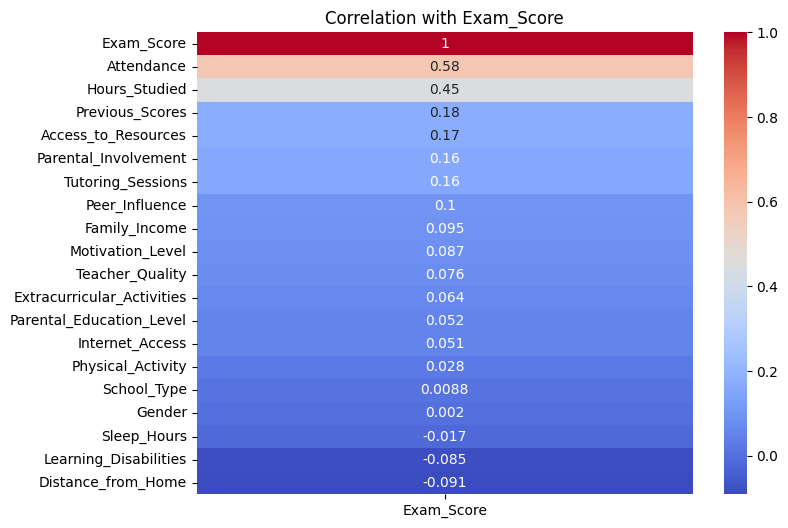

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True)[['Exam_Score']].sort_values(by='Exam_Score', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with Exam_Score")
plt.show()